#  Atividades previstas para este Notebook:
> 1. Carregar a tabela olist_ibge_v13  

> 2. Ajustá-lo para ter um modelo aplicado a si.  
>> Criar variável target.  
>> Aplicar Label Encoder nas variáveis categóricas.  

> 3. Aplicar <font color=red>Scaling</font> nas variáveis com valores maiores do que 1.

> 4. Balancear a base utilizando-se do <font color=red>SMOTE over-Sampling</font>   

##  1 - Importação de bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = 100


## 2 - Importação da tabela <font color=red>'olist_ibge_v13'</font> 

In [2]:
olist_ibge_v13 = pd.read_excel('olist_ibge_v13.xlsx', sheet_name = "Sheet1", header = 0, index_col=None) # sem dtype = 'object'

In [3]:
olist_ibge_v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             92935 non-null  int64  
 1   order_id               92935 non-null  object 
 2   product_id             92935 non-null  object 
 3   seller_id              92935 non-null  object 
 4   product_category_name  92935 non-null  object 
 5   sigla_state            92935 non-null  object 
 6   seller_sigla_state     92935 non-null  object 
 7   review_score           92935 non-null  int64  
 8   qtde_boleto            92935 non-null  int64  
 9   qtde_credit_card       92935 non-null  int64  
 10  qtde_debit_card        92935 non-null  int64  
 11  qtde_voucher           92935 non-null  int64  
 12  soma_payment           92935 non-null  float64
 13  qtde_installments      92935 non-null  int64  
 14  AR_MUN_2018            92935 non-null  float64
 15  PO

### 2.1 - Deletar a coluna  <font color=red>'Unnamed: 0'</font>  
> Ela é um ruído que sempre surge ao importarmos um arquivo para um DataFrame

In [4]:
olist_ibge_v14 = olist_ibge_v13.drop(['Unnamed: 0'], axis=1)

In [5]:
olist_ibge_v14.shape, olist_ibge_v13.shape

((92935, 18), (92935, 19))

In [6]:
olist_ibge_v14.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,5,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,5,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,5,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,4,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80


### 2.2 - Criar coluna target para  <font color=red>'olist_ibge_v14'</font>  
> A partir de 'review_score'.  
>> Chamada 'humor'

In [7]:
olist_ibge_v14.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias'],
      dtype='object')

In [8]:
# Nova coluna chamada 'humor' será 0 (zero), quando review_score for de 1 a 3, ou 1 (um), quando review_score for 4 ou 5.
a = {1:0, 2:0, 3:0 , 4:1, 5:1}
olist_ibge_v14['humor'] = olist_ibge_v14['review_score'].map(a)

In [9]:
olist_ibge_v14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               92935 non-null  object 
 1   product_id             92935 non-null  object 
 2   seller_id              92935 non-null  object 
 3   product_category_name  92935 non-null  object 
 4   sigla_state            92935 non-null  object 
 5   seller_sigla_state     92935 non-null  object 
 6   review_score           92935 non-null  int64  
 7   qtde_boleto            92935 non-null  int64  
 8   qtde_credit_card       92935 non-null  int64  
 9   qtde_debit_card        92935 non-null  int64  
 10  qtde_voucher           92935 non-null  int64  
 11  soma_payment           92935 non-null  float64
 12  qtde_installments      92935 non-null  int64  
 13  AR_MUN_2018            92935 non-null  float64
 14  POPULAÇÃO ESTIMADA     92935 non-null  int64  
 15  PI

In [10]:
olist_ibge_v14['humor'].unique()

array([1, 0], dtype=int64)

In [11]:
qtde_humores = olist_ibge_v14.groupby('humor')['order_id'].count()

In [12]:
df_qtde_humores = pd.DataFrame(qtde_humores)

In [13]:
df_qtde_humores

,order_id
humor,
0,19868
1,73067


In [14]:
print(73067+19868)

92935


In [15]:
print(19868*100/92935)

21.378382740625167


In [16]:
print(73067*100/92935)

78.62161725937483


In [17]:
olist_ibge_v14.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias,humor
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,5,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11,1
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,5,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84,1
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,5,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63,1
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,4,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10,1
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80,1


In [18]:
crosstab = pd.crosstab(olist_ibge_v14['dias'], olist_ibge_v14['humor'], margins = True)

In [19]:
crosstab.head()

humor,0,1,All
dias,,,
0.53,0,1,1
0.78,1,0,1
0.86,1,0,1
0.86,1,0,1
0.89,0,1,1


In [20]:
olist_ibge_v14.describe()

,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias,humor
count,"92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00"
mean,4.15,0.20,0.77,0.02,0.06,160.50,2.93,"1,279.54","2,826,551.15","151,772,033.94",0.79,12.56,0.79
std,1.29,0.40,0.43,0.12,0.41,219.69,2.72,"3,553.72","4,325,960.32","247,687,238.20",0.11,9.51,0.41
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.56,838.00,"14,959.96",0.35,0.53,0.00
25%,4.00,0.00,1.00,0.00,0.00,62.01,1.00,318.68,"102,268.00","2,921,663.24",0.74,6.79,1.00
50%,5.00,0.00,1.00,0.00,0.00,105.28,2.00,693.83,"477,798.00","18,469,475.89",0.80,10.22,1.00
75%,5.00,0.00,1.00,0.00,0.00,177.28,4.00,"1,521.11","2,938,092.00","88,277,462.53",0.87,15.71,1.00
max,5.00,1.00,2.00,2.00,25.00,"13,664.08",24.00,"159,533.33","12,038,175.00","687,035,889.61",0.99,209.63,1.00


In [21]:
# Deletar 'qtde_boleto', por correlação de -0.9 com 'qtde_credit_card', e 'POPULAÇAO ESTIMADA', por ter correlação de 1 com 'PIB'
# Deletar 'order_id' por ser somente chave primária e 'review_score', pois já temos oriunda dela a coluna 'humor', nosso alvo.
olist_ibge_v15 = olist_ibge_v14.drop(['qtde_boleto', 'POPULAÇÃO ESTIMADA', 'order_id', 'review_score'], axis=1)

In [22]:
olist_ibge_v15.shape, olist_ibge_v14.shape

((92935, 15), (92935, 19))

In [23]:
olist_ibge_v15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             92935 non-null  object 
 1   seller_id              92935 non-null  object 
 2   product_category_name  92935 non-null  object 
 3   sigla_state            92935 non-null  object 
 4   seller_sigla_state     92935 non-null  object 
 5   qtde_credit_card       92935 non-null  int64  
 6   qtde_debit_card        92935 non-null  int64  
 7   qtde_voucher           92935 non-null  int64  
 8   soma_payment           92935 non-null  float64
 9   qtde_installments      92935 non-null  int64  
 10  AR_MUN_2018            92935 non-null  float64
 11  PIB                    92935 non-null  float64
 12  gini                   92935 non-null  float64
 13  dias                   92935 non-null  float64
 14  humor                  92935 non-null  int64  
dtypes:

In [24]:
olist_ibge_v15.head()

,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor
0,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,1,0,0,219.63,10,881.06,"180,088.78",0.65,21.11,1
1,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,1,0,0,135.59,1,881.06,"180,088.78",0.65,5.84,1
2,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,0,0,0,58.28,1,881.06,"180,088.78",0.65,8.63,1
3,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,1,0,0,"1,025.52",8,"1,045.13","287,984.49",0.73,29.10,1
4,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,1,0,0,220.97,4,"1,817.07","430,235.36",0.66,4.80,1


### Importação da biblioteca LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

### Chamando o objeto

In [26]:
le = LabelEncoder()

### Verificando o objeto le

In [27]:
le

LabelEncoder()

### Aplicação do objeto aos dados categóricos de '<font color=red>olist_ibge_v14</font>'

In [28]:
le_product_id = le.fit_transform(olist_ibge_v14['product_id'])

In [29]:
le_seller_id = le.fit_transform(olist_ibge_v14['seller_id'])

In [30]:
le_product_category_name = le.fit_transform(olist_ibge_v14['product_category_name'])

In [31]:
le_sigla_state = le.fit_transform(olist_ibge_v14['sigla_state'])

In [32]:
le_seller_sigla_state = le.fit_transform(olist_ibge_v14['seller_sigla_state'])

### Exibição do array le_sigla_state
> le_sigla_state é um array.<br>
>Portanto, será necessário transformá-lo em dataframe.  
>> Aliás, vamos transformar em array os 05 (cinco) conjuntos gerados acima cujos nomes são 'le_qualquer_coisa'

In [33]:
le_sigla_state

array([10, 10, 10, ...,  9,  9, 23])

In [34]:
df_le_product_id = pd.DataFrame(le_product_id,columns = ['le_product_id'])

In [35]:
df_le_seller_id = pd.DataFrame(le_seller_id,columns = ['le_seller_id'])

In [36]:
df_le_product_category_name = pd.DataFrame(le_product_category_name,columns = ['le_product_category_name'])

In [37]:
df_le_sigla_state = pd.DataFrame(le_sigla_state,columns = ['le_sigla_state'])

In [38]:
df_le_seller_sigla_state = pd.DataFrame(le_seller_sigla_state,columns = ['le_seller_sigla_state'])

###  Exibição das linhas iniciais dos DataFrame do LabelEncoder.

In [39]:
df_le_product_id.head()

,le_product_id
0,7841
1,1976
2,22780
3,1247
4,25080


In [40]:
df_le_seller_id.head()

,le_seller_id
0,207
1,769
2,1011
3,2810
4,160


In [41]:
df_le_product_category_name.head()

,le_product_category_name
0,26
1,32
2,48
3,31
4,11


In [42]:
df_le_sigla_state.head()

,le_sigla_state
0,10
1,10
2,10
3,8
4,10


In [43]:
df_le_seller_sigla_state.head()

,le_seller_sigla_state
0,18
1,21
2,15
3,21
4,7


### Junção dos dataframes 'le_qualquer_coisa' com 'olist_ibge_vxx'

In [44]:
olist_ibge_v16 = pd.merge(olist_ibge_v15, # tabela da esquerda a ser juntada
                         df_le_product_id,  # tabela da direita a ser juntada
                         left_index=True, #If True, use the index (row labels) from the left DataFrame or Series as its join key(s)
                         right_index=True) #Same usage as left_index for the right DataFrame or Series

In [45]:
olist_ibge_v17 = pd.merge(olist_ibge_v16, df_le_seller_id, left_index=True, right_index=True)

In [46]:
olist_ibge_v18 = pd.merge(olist_ibge_v17, df_le_product_category_name, left_index=True, right_index=True)

In [47]:
olist_ibge_v19 = pd.merge(olist_ibge_v18, df_le_sigla_state, left_index=True, right_index=True)

In [48]:
olist_ibge_v20 = pd.merge(olist_ibge_v19, df_le_seller_sigla_state, left_index=True, right_index=True)

### Deleção dos campos que foram codificados

In [49]:
olist_ibge_v21 = olist_ibge_v20.drop(columns=['product_id', 'seller_id', 'product_category_name', 'sigla_state', 'seller_sigla_state'])

In [50]:
olist_ibge_v21.shape, olist_ibge_v20.shape, olist_ibge_v15.shape

((92935, 15), (92935, 20), (92935, 15))

In [51]:
olist_ibge_v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   qtde_credit_card          92935 non-null  int64  
 1   qtde_debit_card           92935 non-null  int64  
 2   qtde_voucher              92935 non-null  int64  
 3   soma_payment              92935 non-null  float64
 4   qtde_installments         92935 non-null  int64  
 5   AR_MUN_2018               92935 non-null  float64
 6   PIB                       92935 non-null  float64
 7   gini                      92935 non-null  float64
 8   dias                      92935 non-null  float64
 9   humor                     92935 non-null  int64  
 10  le_product_id             92935 non-null  int32  
 11  le_seller_id              92935 non-null  int32  
 12  le_product_category_name  92935 non-null  int32  
 13  le_sigla_state            92935 non-null  int32  
 14  le_sel

In [52]:
olist_ibge_v21.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,1,0,0,219.63,10,881.06,"180,088.78",0.65,21.11,1,7841,207,26,10,18
1,1,0,0,135.59,1,881.06,"180,088.78",0.65,5.84,1,1976,769,32,10,21
2,0,0,0,58.28,1,881.06,"180,088.78",0.65,8.63,1,22780,1011,48,10,15
3,1,0,0,"1,025.52",8,"1,045.13","287,984.49",0.73,29.10,1,1247,2810,31,8,21
4,1,0,0,220.97,4,"1,817.07","430,235.36",0.66,4.80,1,25080,160,11,10,7


In [53]:
olist_ibge_v21.isna().sum()

qtde_credit_card            0
qtde_debit_card             0
qtde_voucher                0
soma_payment                0
qtde_installments           0
AR_MUN_2018                 0
PIB                         0
gini                        0
dias                        0
humor                       0
le_product_id               0
le_seller_id                0
le_product_category_name    0
le_sigla_state              0
le_seller_sigla_state       0
dtype: int64

In [54]:
print(73067+19868)

92935


In [55]:
print(19868*100/92935)

21.378382740625167


In [56]:
print(73067*100/92935)

78.62161725937483


## SCALING

In [57]:
merged = olist_ibge_v21.copy()

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in olist_ibge_v21.columns if olist_ibge_v21[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]
    
merged.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,0.50,0.00,0.00,0.02,0.42,0.01,0.00,0.65,0.10,1,0.26,0.07,0.36,0.38,0.86
1,0.50,0.00,0.00,0.01,0.04,0.01,0.00,0.65,0.03,1,0.07,0.27,0.44,0.38,1.00
2,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.65,0.04,1,0.76,0.35,0.67,0.38,0.71
3,0.50,0.00,0.00,0.08,0.33,0.01,0.00,0.73,0.14,1,0.04,0.97,0.43,0.31,1.00
4,0.50,0.00,0.00,0.02,0.17,0.01,0.00,0.66,0.02,1,0.83,0.06,0.15,0.38,0.33


In [59]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   qtde_credit_card          92935 non-null  float64
 1   qtde_debit_card           92935 non-null  float64
 2   qtde_voucher              92935 non-null  float64
 3   soma_payment              92935 non-null  float64
 4   qtde_installments         92935 non-null  float64
 5   AR_MUN_2018               92935 non-null  float64
 6   PIB                       92935 non-null  float64
 7   gini                      92935 non-null  float64
 8   dias                      92935 non-null  float64
 9   humor                     92935 non-null  int64  
 10  le_product_id             92935 non-null  float64
 11  le_seller_id              92935 non-null  float64
 12  le_product_category_name  92935 non-null  float64
 13  le_sigla_state            92935 non-null  float64
 14  le_sel

In [60]:
merged.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,0.50,0.00,0.00,0.02,0.42,0.01,0.00,0.65,0.10,1,0.26,0.07,0.36,0.38,0.86
1,0.50,0.00,0.00,0.01,0.04,0.01,0.00,0.65,0.03,1,0.07,0.27,0.44,0.38,1.00
2,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.65,0.04,1,0.76,0.35,0.67,0.38,0.71
3,0.50,0.00,0.00,0.08,0.33,0.01,0.00,0.73,0.14,1,0.04,0.97,0.43,0.31,1.00
4,0.50,0.00,0.00,0.02,0.17,0.01,0.00,0.66,0.02,1,0.83,0.06,0.15,0.38,0.33


In [61]:
# Parada para avaliação
# O dataframe normalizado é o 'merged', que tem os campos que já tinha valores entre 0 e 1. 
# O dataframe 'scaled' tem somente as colunas que foram normalizados e, portanto, tem um número de colunas menor.

### Separar as explicativas da variável 'target' (variável alvo, a ser prevista).

In [62]:
explicativas = merged.drop(columns=['humor'])
target = merged['humor']

In [63]:
explicativas.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,0.50,0.00,0.00,0.02,0.42,0.01,0.00,0.65,0.10,0.26,0.07,0.36,0.38,0.86
1,0.50,0.00,0.00,0.01,0.04,0.01,0.00,0.65,0.03,0.07,0.27,0.44,0.38,1.00
2,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.65,0.04,0.76,0.35,0.67,0.38,0.71
3,0.50,0.00,0.00,0.08,0.33,0.01,0.00,0.73,0.14,0.04,0.97,0.43,0.31,1.00
4,0.50,0.00,0.00,0.02,0.17,0.01,0.00,0.66,0.02,0.83,0.06,0.15,0.38,0.33


In [64]:
explicativas.dtypes

qtde_credit_card            float64
qtde_debit_card             float64
qtde_voucher                float64
soma_payment                float64
qtde_installments           float64
AR_MUN_2018                 float64
PIB                         float64
gini                        float64
dias                        float64
le_product_id               float64
le_seller_id                float64
le_product_category_name    float64
le_sigla_state              float64
le_seller_sigla_state       float64
dtype: object

In [65]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: humor, dtype: int64

## Criação de dataframe com variaveis selecionadas  
> Todas as variáveis selecionadas, exceto as de alta cardinalidade.

In [66]:
# Rodaremos os modelos com variáveis explicativas definidas no título do notebook.

expl = explicativas[[ 'dias',  'soma_payment',  'le_product_id', 'le_seller_id', 'le_product_category_name',  'PIB', 'AR_MUN_2018', 'gini', 'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'qtde_installments', 'le_sigla_state', 'le_seller_sigla_state']]

expl.head()


,dias,soma_payment,le_product_id,le_seller_id,le_product_category_name,PIB,AR_MUN_2018,gini,qtde_credit_card,qtde_debit_card,qtde_voucher,qtde_installments,le_sigla_state,le_seller_sigla_state
0,0.10,0.02,0.26,0.07,0.36,0.00,0.01,0.65,0.50,0.00,0.00,0.42,0.38,0.86
1,0.03,0.01,0.07,0.27,0.44,0.00,0.01,0.65,0.50,0.00,0.00,0.04,0.38,1.00
2,0.04,0.00,0.76,0.35,0.67,0.00,0.01,0.65,0.00,0.00,0.00,0.04,0.38,0.71
3,0.14,0.08,0.04,0.97,0.43,0.00,0.01,0.73,0.50,0.00,0.00,0.33,0.31,1.00
4,0.02,0.02,0.83,0.06,0.15,0.00,0.01,0.66,0.50,0.00,0.00,0.17,0.38,0.33


In [67]:
expl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dias                      92935 non-null  float64
 1   soma_payment              92935 non-null  float64
 2   le_product_id             92935 non-null  float64
 3   le_seller_id              92935 non-null  float64
 4   le_product_category_name  92935 non-null  float64
 5   PIB                       92935 non-null  float64
 6   AR_MUN_2018               92935 non-null  float64
 7   gini                      92935 non-null  float64
 8   qtde_credit_card          92935 non-null  float64
 9   qtde_debit_card           92935 non-null  float64
 10  qtde_voucher              92935 non-null  float64
 11  qtde_installments         92935 non-null  float64
 12  le_sigla_state            92935 non-null  float64
 13  le_seller_sigla_state     92935 non-null  float64
dtypes: flo

# Separação em treino e teste

In [68]:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(expl,
                                                       target,
                                                       test_size=0.3,
                                                       random_state=196)

## Random Forest

In [69]:
#1 - definir um dict(dicionario com os valores dos hiperparams)

rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[50,100,200,300,800,1000],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [196]
}

In [70]:
rf_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [196]}

In [71]:
#2 - chamar o modulo de tunning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [72]:
#3 - chamar obj do tunning
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,       # parametro a ser utilizado. No caso, random forest
                      param_grid=rf_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)               # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)

In [73]:
rf_grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [74]:
#4  - treinamento
rf_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [75]:
#5  - avaliar os resultados
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 1000,
 'random_state': 196}

In [76]:
rf_grid.best_score_

0.813032302943679

##  Importação da biblioteca - cálculo da acurácia

In [77]:
from sklearn.metrics import accuracy_score

## Acurácia de treino - para modelo Random Forest

In [78]:
rf_grid.best_score_

0.813032302943679

In [79]:
acc_rf_treino = accuracy_score(y_treino, 
                              rf_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_treino))
acc_rf_treino

1.0

##  Acurácia de teste - para modelo Random Forest

In [80]:
acc_rf_teste = accuracy_score(y_teste, 
                              rf_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_teste))
acc_rf_teste

0.8105161220903124

##  Classification report - para modelo Random Forest

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_treino,rf_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13907
           1       1.00      1.00      1.00     51147

    accuracy                           1.00     65054
   macro avg       1.00      1.00      1.00     65054
weighted avg       1.00      1.00      1.00     65054



In [83]:
print(classification_report(y_teste,rf_grid.predict(x_teste)))
print ("A acurácia da previsão é ", accuracy_score(y_teste,rf_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.70      0.20      0.31      5961
           1       0.82      0.98      0.89     21920

    accuracy                           0.81     27881
   macro avg       0.76      0.59      0.60     27881
weighted avg       0.79      0.81      0.77     27881

A acurácia da previsão é  0.8105161220903124


In [84]:
#matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_teste, rf_grid.predict(x_teste))

In [85]:
#matriz de confusão
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


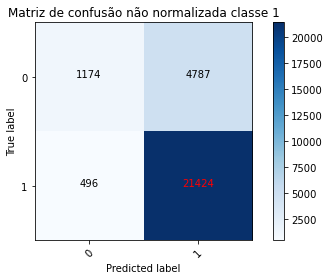

In [86]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão não normalizada classe 1', normalize=False)

In [87]:
tn = cnf_matrix[0,0]
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0] 
fp = cnf_matrix[0,1]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [88]:
print (recall)
print (precisão)
print (accuracy)

0.9773722627737226
0.8173667544160849
0.8105161220903124


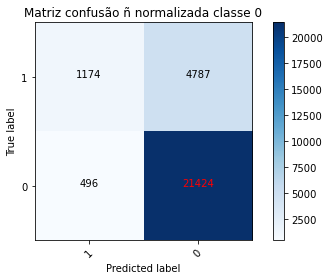

In [89]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['1', '0'],
                      title='Matriz confusão ñ normalizada classe 0', normalize=False)

In [90]:
tn = cnf_matrix[1,1]
tp = cnf_matrix[0,0]
fn = cnf_matrix[0,1] 
fp = cnf_matrix[1,0]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

### Complementação Mário - Matriz de Confusão, Sensibilidade, Especificidade e Feature_importances

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [92]:
cm1 = confusion_matrix(y_true= y_teste,
                       y_pred= rf_grid.predict(x_teste))
cm1

array([[ 1174,  4787],
       [  496, 21424]], dtype=int64)

In [93]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [94]:
print('Random Forest')
print('===================================================')
print('O  recall  da  classe  0  é   : %.2f ' % recall)
print ('A  precisão  da classe 0  é   : %.2f '% precisão)
print ('A  ACURÁCIA DA  PREVISÃO   é  : %.2f '% accuracy)
print('A sensitibilidade da classe 0 : %.2f'% sensitivity1 )
print('A especificidade da classe 0  : %.2f'% specificity1)

Random Forest
O  recall  da  classe  0  é   : 0.20 
A  precisão  da classe 0  é   : 0.70 
A  ACURÁCIA DA  PREVISÃO   é  : 0.81 
A sensitibilidade da classe 0 : 0.20
A especificidade da classe 0  : 0.98


In [95]:
rf_grid.best_estimator_.feature_importances_

array([0.22685885, 0.13017056, 0.12398463, 0.10852616, 0.07508467,
       0.07160865, 0.06965341, 0.06906847, 0.0137849 , 0.00264288,
       0.00748829, 0.04429665, 0.03537709, 0.02145478])

In [96]:
a=pd.concat([pd.Series(x_teste.columns), pd.Series(rf_grid.best_estimator_.feature_importances_)], axis=1)

In [97]:
print('Random Forest Feature Importance')
a.sort_values(by=1, ascending=False)

Random Forest Feature Importance


,0,1
0,dias,0.23
1,soma_payment,0.13
2,le_product_id,0.12
3,le_seller_id,0.11
4,le_product_category_name,0.08
5,PIB,0.07
6,AR_MUN_2018,0.07
7,gini,0.07
11,qtde_installments,0.04
12,le_sigla_state,0.04


## USO DO SMOTE

### SMOTE

In [98]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [99]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

expl_sm, target_sm = sm.fit_resample(expl, target)

print(f'''Shape de expl antes do SMOTE: {expl.shape}
Shape de expl após SMOTE: {expl_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
target_sm.value_counts(normalize=True) * 100

Shape de expl antes do SMOTE: (92935, 14)
Shape de expl após SMOTE: (146134, 14)

Balance of positive and negative classes (%):


1   50.00
0   50.00
Name: humor, dtype: float64

## Treinamento e Teste da Base com Smote

# Separação em treino e teste

In [100]:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(expl_sm,
                                                       target_sm,
                                                       test_size=0.3,
                                                       random_state=196)

## Random Forest

In [101]:
#1 - definir um dict(dicionario com os valores dos hiperparams)

rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[50,100,200,300,800,1000],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [196]
}

In [102]:
rf_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [196]}

In [103]:
#2 - chamar o modulo de tunning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [104]:
#3 - chamar obj do tunning
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,       # parametro a ser utilizado. No caso, random forest
                      param_grid=rf_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)               # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)

In [105]:
rf_grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [106]:
#4  - treinamento
rf_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [107]:
#5  - avaliar os resultados
rf_grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'n_estimators': 1000,
 'random_state': 196}

In [108]:
rf_grid.best_score_

0.8540565478690482

##  Importação da biblioteca - cálculo da acurácia

In [109]:
from sklearn.metrics import accuracy_score

## Acurácia de treino - para modelo Random Forest

In [110]:
rf_grid.best_score_

0.8540565478690482

In [111]:
acc_rf_treino = accuracy_score(y_treino, 
                              rf_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_treino))
acc_rf_treino

1.0

##  Acurácia de teste - para modelo Random Forest

In [112]:
acc_rf_teste = accuracy_score(y_teste, 
                              rf_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_teste))
acc_rf_teste

0.8524668689126617

##  Classification report - para modelo Random Forest

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_treino,rf_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51018
           1       1.00      1.00      1.00     51275

    accuracy                           1.00    102293
   macro avg       1.00      1.00      1.00    102293
weighted avg       1.00      1.00      1.00    102293



In [115]:
print(classification_report(y_teste,rf_grid.predict(x_teste)))
print ("A acurácia da previsão é ", accuracy_score(y_teste,rf_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84     22049
           1       0.82      0.91      0.86     21792

    accuracy                           0.85     43841
   macro avg       0.86      0.85      0.85     43841
weighted avg       0.86      0.85      0.85     43841

A acurácia da previsão é  0.8524668689126617


In [130]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [116]:
#matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_teste, rf_grid.predict(x_teste))

In [117]:
#matriz de confusão
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


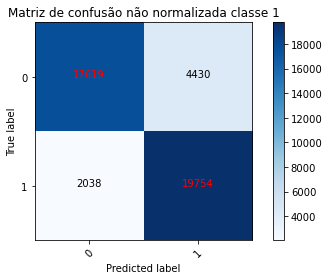

In [118]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão não normalizada classe 1', normalize=False)

In [119]:
tn = cnf_matrix[0,0]
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0] 
fp = cnf_matrix[0,1]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [120]:
print (recall)
print (precisão)
print (accuracy)

0.9064794419970631
0.8168210387032749
0.8524668689126617


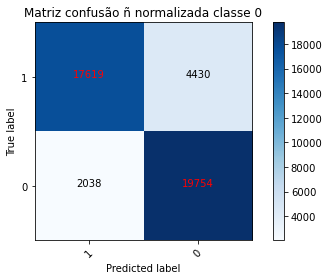

In [121]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['1', '0'],
                      title='Matriz confusão ñ normalizada classe 0', normalize=False)

In [122]:
tn = cnf_matrix[1,1]
tp = cnf_matrix[0,0]
fn = cnf_matrix[0,1] 
fp = cnf_matrix[1,0]
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

### Complementação Mário - Matriz de Confusão, Sensibilidade, Especificidade e Feature_importances

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [124]:
cm1 = confusion_matrix(y_true= y_teste,
                       y_pred= rf_grid.predict(x_teste))
cm1

array([[17619,  4430],
       [ 2038, 19754]], dtype=int64)

In [125]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [126]:
print('Random Forest com SMOTE')
print('===================================================')
print('O  recall  da  classe  0  é   : %.2f ' % recall)
print ('A  precisão  da classe 0  é   : %.2f '% precisão)
print ('A  ACURÁCIA DA  PREVISÃO   é  : %.2f '% accuracy)
print('A sensitibilidade da classe 0 : %.2f'% sensitivity1 )
print('A especificidade da classe 0  : %.2f'% specificity1)

Random Forest com SMOTE
O  recall  da  classe  0  é   : 0.80 
A  precisão  da classe 0  é   : 0.90 
A  ACURÁCIA DA  PREVISÃO   é  : 0.85 
A sensitibilidade da classe 0 : 0.80
A especificidade da classe 0  : 0.91


In [127]:
rf_grid.best_estimator_.feature_importances_

array([0.17706392, 0.10228219, 0.10312248, 0.09854949, 0.09249433,
       0.07489174, 0.06616864, 0.06466677, 0.00796016, 0.00197934,
       0.01646512, 0.104295  , 0.05224466, 0.03781616])

In [128]:
a=pd.concat([pd.Series(x_teste.columns), pd.Series(rf_grid.best_estimator_.feature_importances_)], axis=1)

In [129]:
print('Random Forest Feature Importance com SMOTE')
a.sort_values(by=1, ascending=False)

Random Forest Feature Importance com SMOTE


,0,1
0,dias,0.18
11,qtde_installments,0.10
2,le_product_id,0.10
1,soma_payment,0.10
3,le_seller_id,0.10
4,le_product_category_name,0.09
5,PIB,0.07
6,AR_MUN_2018,0.07
7,gini,0.06
12,le_sigla_state,0.05
